In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop3.2.tgz
!tar -xvf spark-3.0.3-bin-hadoop3.2.tgz   #extract the file using the tar command
!pip install -q findspark     #install python package 

spark-3.0.3-bin-hadoop3.2/
spark-3.0.3-bin-hadoop3.2/NOTICE
spark-3.0.3-bin-hadoop3.2/kubernetes/
spark-3.0.3-bin-hadoop3.2/kubernetes/tests/
spark-3.0.3-bin-hadoop3.2/kubernetes/tests/worker_memory_check.py
spark-3.0.3-bin-hadoop3.2/kubernetes/tests/py_container_checks.py
spark-3.0.3-bin-hadoop3.2/kubernetes/tests/pyfiles.py
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/R/
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/python/
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/python/Dockerfile
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/Dockerfile
spark-3.0.3-bin-hadoop3.2/jars/
spark-3.0.3-bin-hadoop3.2/jars/hive-

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession  #Connect spark code on top of spark engine
spark = SparkSession.builder.master("local[4]").getOrCreate()

In [ ]:
import pyspark
from pyspark.context import SparkContext 

from pyspark import SparkConf 
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[13]"))

#Map Reduce

In [ ]:
data=sc.textFile("/content/map_reduce.csv").map(lambda line: line.split(",")).map(lambda record: (record[0],record[1],record[2],record[3],record[4],record[5],record[6],record[7],record[8],record[9],record[10],record[11],record[12],record[13],record[14]))
data.collect()

[('MHK',
  'AMW',
  '"Manhattan',
  ' KS"',
  '"Ames',
  ' IA"',
  '21',
  '30',
  '1',
  '254',
  '01-10-2008',
  '122049',
  '86219',
  '39.14099884',
  '-96.67079926'),
 ('EUG',
  'RDM',
  '"Eugene',
  ' OR"',
  '"Bend',
  ' OR"',
  '41',
  '396',
  '22',
  '103',
  '01-11-1990',
  '284093',
  '76034',
  '44.12459946',
  '-123.211998'),
 ('EUG',
  'RDM',
  '"Eugene',
  ' OR"',
  '"Bend',
  ' OR"',
  '88',
  '342',
  '19',
  '103',
  '01-12-1990',
  '284093',
  '76034',
  '44.12459946',
  '-123.211998'),
 ('EUG',
  'RDM',
  '"Eugene',
  ' OR"',
  '"Bend',
  ' OR"',
  '11',
  '72',
  '4',
  '103',
  '01-10-1990',
  '284093',
  '76034',
  '44.12459946',
  '-123.211998'),
 ('MFR',
  'RDM',
  '"Medford',
  ' OR"',
  '"Bend',
  ' OR"',
  '0',
  '18',
  '1',
  '156',
  '01-02-1990',
  '147300',
  '76034',
  '42.37419891',
  '-122.8730011'),
 ('MFR',
  'RDM',
  '"Medford',
  ' OR"',
  '"Bend',
  ' OR"',
  '11',
  '18',
  '1',
  '156',
  '01-03-1990',
  '147300',
  '76034',
  '42.37419891',


In [ ]:
origin_airport_passenger = data.map(lambda orig:(orig[0],int(orig[6]))).reduceByKey(lambda a,b:a+b)
origin_airport_passenger.collect()

[('SEA', 17966),
 ('PDX', 354295),
 ('LMT', 13235),
 ('SFO', 47513),
 ('LAX', 3588),
 ('EAT', 53),
 ('EKO', 703),
 ('LWS', 26),
 ('ACV', 4),
 ('MHK', 21),
 ('EUG', 1259),
 ('MFR', 151),
 ('YKM', 25),
 ('SLE', 5),
 ('GEG', 33),
 ('RDD', 545),
 ('AST', 6),
 ('CLM', 25),
 ('PDT', 2),
 ('SJC', 5993),
 ('PUW', 9)]

In [ ]:
date_passenger = data.map(lambda date:(date[10],int(date[6]))).reduceByKey(lambda a,b:a+b)
date_passenger.collect()

[('01-10-2008', 21),
 ('01-12-1990', 4762),
 ('01-03-1990', 6471),
 ('01-01-1990', 4127),
 ('01-09-1990', 2696),
 ('01-06-1990', 4254),
 ('01-08-1990', 5024),
 ('01-05-1990', 3660),
 ('01-07-1990', 4699),
 ('01-12-1991', 6017),
 ('01-09-1991', 5181),
 ('01-05-1991', 5549),
 ('01-08-1991', 6954),
 ('01-07-1991', 6818),
 ('01-09-1992', 5191),
 ('01-06-1992', 5917),
 ('01-08-1992', 6462),
 ('01-10-1992', 4819),
 ('01-12-1992', 6469),
 ('01-04-1992', 4797),
 ('01-05-1992', 4684),
 ('01-11-1992', 4809),
 ('01-01-1992', 4395),
 ('01-01-1993', 5029),
 ('01-09-1993', 3509),
 ('01-10-1993', 3367),
 ('01-10-1994', 5110),
 ('01-06-1994', 4985),
 ('01-04-1994', 3924),
 ('01-08-1994', 6029),
 ('01-11-1994', 5238),
 ('01-07-1994', 5703),
 ('01-03-1994', 4038),
 ('01-09-1995', 5412),
 ('01-08-1995', 7988),
 ('01-06-1995', 6835),
 ('01-02-1995', 4272),
 ('01-03-1995', 4750),
 ('01-01-1995', 4544),
 ('01-04-1995', 4108),
 ('01-12-1995', 6279),
 ('01-11-1996', 6580),
 ('01-04-1996', 5261),
 ('01-10-1996

In [ ]:
df = spark.read.csv("/content/airports_reduced.csv", header=True, inferSchema=True)
df.registerTempTable('df')

In [ ]:
df.printSchema()

root
 |-- Origin_airport: string (nullable = true)
 |-- Destination_airport: string (nullable = true)
 |-- Origin_city: string (nullable = true)
 |-- Destination_city: string (nullable = true)
 |-- Passengers: integer (nullable = true)
 |-- Seats: integer (nullable = true)
 |-- Flights: integer (nullable = true)
 |-- Distance: integer (nullable = true)
 |-- Fly_date: string (nullable = true)
 |-- Origin_population: integer (nullable = true)
 |-- Destination_population: integer (nullable = true)
 |-- Org_airport_lat: string (nullable = true)
 |-- Org_airport_long: string (nullable = true)
 |-- Dest_airport_lat: string (nullable = true)
 |-- Dest_airport_long: string (nullable = true)



In [ ]:
df.count()

74217

In [ ]:
df.describe().show()

+-------+--------------+-------------------+------------+----------------+------------------+------------------+-----------------+-----------------+----------+-----------------+----------------------+-----------------+-----------------+-----------------+------------------+
|summary|Origin_airport|Destination_airport| Origin_city|Destination_city|        Passengers|             Seats|          Flights|         Distance|  Fly_date|Origin_population|Destination_population|  Org_airport_lat| Org_airport_long| Dest_airport_lat| Dest_airport_long|
+-------+--------------+-------------------+------------+----------------+------------------+------------------+-----------------+-----------------+----------+-----------------+----------------------+-----------------+-----------------+-----------------+------------------+
|  count|         74217|              74217|       74217|           74217|             74217|             74217|            74217|            74217|     74217|            74217| 

In [ ]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Origin_airport,74217,None,None,ABE,YUM
Destination_airport,74217,None,None,ACT,YUM
Origin_city,74217,None,None,"Aberdeen, SD","Yuma, AZ"
Destination_city,74217,None,None,"Akron, OH","Yuma, AZ"
Passengers,74217,2258.6351375021895,3778.589652499597,0,73505
Seats,74217,3580.2349057493566,5608.353583669643,0,89790
Flights,74217,32.32231159976825,46.22818655994732,0,730
Distance,74217,678.1930959214196,546.3547071652132,0,4862
Fly_date,74217,None,None,1990-01-01,2009-12-01


In [ ]:
df.show(5)

+--------------+-------------------+-------------+----------------+----------+-----+-------+--------+----------+-----------------+----------------------+----------------+-----------------+----------------+-----------------+
|Origin_airport|Destination_airport|  Origin_city|Destination_city|Passengers|Seats|Flights|Distance|  Fly_date|Origin_population|Destination_population| Org_airport_lat| Org_airport_long|Dest_airport_lat|Dest_airport_long|
+--------------+-------------------+-------------+----------------+----------+-----+-------+--------+----------+-----------------+----------------------+----------------+-----------------+----------------+-----------------+
|           MHK|                AMW|Manhattan, KS|        Ames, IA|        21|   30|      1|     254|2008-10-01|           122049|                 86219| 39.140998840332|-96.6707992553711|              NA|               NA|
|           EUG|                RDM|   Eugene, OR|        Bend, OR|        41|  396|     22|     103|199

In [ ]:
df.select("Origin_airport","Destination_airport","Passengers","Seats").show(15)

+--------------+-------------------+----------+-----+
|Origin_airport|Destination_airport|Passengers|Seats|
+--------------+-------------------+----------+-----+
|           MHK|                AMW|        21|   30|
|           EUG|                RDM|        41|  396|
|           EUG|                RDM|        88|  342|
|           EUG|                RDM|        11|   72|
|           MFR|                RDM|         0|   18|
|           MFR|                RDM|        11|   18|
|           MFR|                RDM|         2|   72|
|           MFR|                RDM|         7|   18|
|           MFR|                RDM|         7|   36|
|           SEA|                RDM|         8|   18|
|           SEA|                RDM|       453| 3128|
|           SEA|                RDM|       784| 2720|
|           SEA|                RDM|       749| 2992|
|           SEA|                RDM|        11|   18|
|           PDX|                RDM|       349|  851|
+--------------+------------

In [ ]:
from pyspark.sql import SQLContext 
from pyspark.sql import functions as F
from pyspark.sql.functions import col
from pyspark.sql.functions import desc

sqlContext=SQLContext(sc)

In [ ]:
airportAgg_DF = df.groupBy("Origin_airport").agg(F.sum("Passengers"))
airportAgg_DF.show(10)

+--------------+---------------+
|Origin_airport|sum(Passengers)|
+--------------+---------------+
|           BGM|            483|
|           MOR|              0|
|           MSY|        1270467|
|           RDG|           2367|
|           GEG|         110034|
|           DRT|              0|
|           SNA|         584609|
|           GTF|          16623|
|           GRB|          15250|
|           FOD|           3465|
+--------------+---------------+
only showing top 10 rows



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
originAirports = sqlContext.sql("""select Origin_Airport, sum(Flights) as Flights 
                                    from df group by Origin_Airport order by sum(Flights) DESC limit 10""")
originAirports.show()

+--------------+-------+
|Origin_Airport|Flights|
+--------------+-------+
|           HNL| 170702|
|           ATL| 165736|
|           DFW| 124610|
|           PDX| 107741|
|           LAS| 102685|
|           DTW| 100901|
|           ORD|  98055|
|           LAX|  90289|
|           SEA|  79015|
|           SFO|  78131|
+--------------+-------+



In [ ]:
org_Airport=originAirports.toPandas()

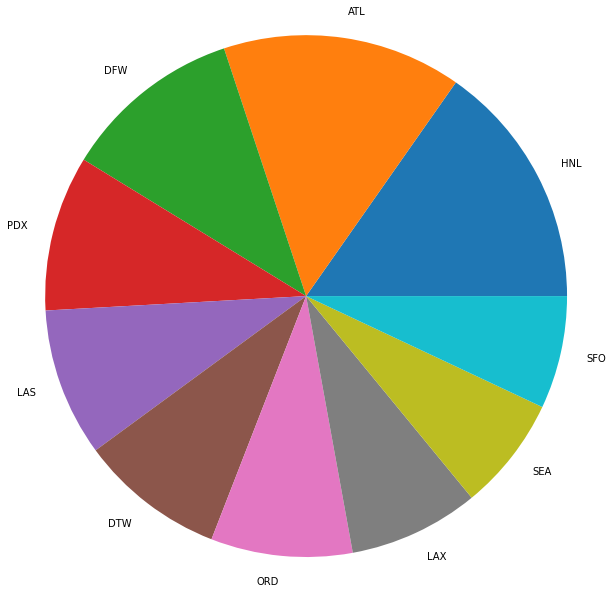

In [ ]:
plt.pie(org_Airport['Flights'], labels =org_Airport['Origin_Airport'], radius=3)
plt.show()

In [ ]:
MostFlightsByAirports = sqlContext.sql("""with destination as (select Destination_airport as Airport, sum(Flights) as Out_Flights 
                                    from df group by Destination_airport),
                                    origin as (select Origin_airport as Airport, sum(Flights) as In_Flights 
                                    from df group by Origin_airport)
                                    select origin.Airport, (destination.Out_Flights+origin.In_Flights) as Total_Flights
                                    from origin, destination 
                                    where origin.Airport = destination.Airport
                                    order by (origin.In_Flights + destination.Out_Flights) DESC
                                    limit 15""")
MostFlightsByAirports.show()

+-------+-------------+
|Airport|Total_Flights|
+-------+-------------+
|    MIA|       856236|
|    RNO|       554210|
|    CAK|       161283|
|    FNT|       127994|
|    RDM|       108638|
|    ERI|        80363|
|    FAR|        69904|
|    ACT|        58052|
|    YUM|        43595|
|    BTM|        39758|
|    MCN|        32077|
|    EKO|        29286|
|    CIC|        17499|
|    HOB|         7419|
|    HON|         4225|
+-------+-------------+



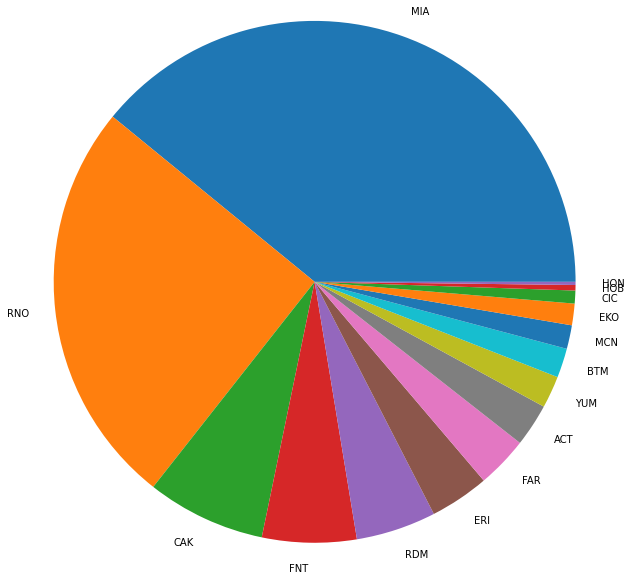

In [ ]:
MostFlightsbyAirports=MostFlightsByAirports.toPandas()
plt.pie(MostFlightsbyAirports['Total_Flights'], labels =MostFlightsbyAirports['Airport'], radius=3)
plt.show() 

In [ ]:
MostPassengersByAirports = sqlContext.sql("""with destination as (select Destination_airport as Airport, sum(Passengers*Flights) as Out_Passengers 
                                    from df group by Destination_airport),
                                    origin as (select Origin_airport as Airport, sum(Passengers) as In_Passengers
                                    from df group by Origin_airport)
                                    select origin.Airport, (destination.Out_Passengers+origin.In_Passengers) as Total_Passengers
                                    from origin, destination 
                                    where origin.Airport = destination.Airport
                                    order by (origin.In_Passengers + destination.Out_Passengers) DESC
                                    limit 15""")
MostPassengersByAirports.show()

+-------+----------------+
|Airport|Total_Passengers|
+-------+----------------+
|    MIA|      5688348832|
|    RNO|      4476354160|
|    CAK|       554628683|
|    FNT|       395171158|
|    RDM|       291413882|
|    FAR|       248798054|
|    ERI|       163961609|
|    ACT|       156731548|
|    YUM|        82148810|
|    MCN|        45773130|
|    BTM|        42962984|
|    EKO|        31973581|
|    CIC|        21865312|
|    GYY|          997510|
|    HOB|          694844|
+-------+----------------+



<BarContainer object of 15 artists>

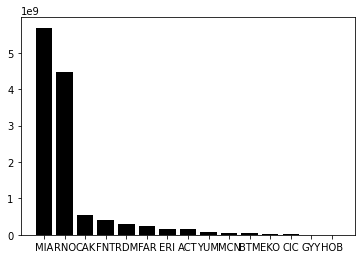

In [ ]:
most_pass=MostPassengersByAirports.toPandas()
plt.bar(most_pass['Airport'],most_pass['Total_Passengers'], color ='black')

In [ ]:
distanceQuery = sqlContext.sql("""with table1 as 
                                    (select least(Origin_airport, Destination_airport) as Airport1, 
                                    greatest(Destination_airport, Origin_airport) as Airport2, 
                                    sum(Flights) as Flights,
                                    sum(Passengers) as Passengers,
                                    sum(Seats) as Seats
                                    from df
                                    group by least(Origin_airport, Destination_airport), greatest(Destination_airport, Origin_airport)
                                    order by 1,2)
                                    select t.*, (Passengers*100/Seats) as Occupancy_Rate
                                    from table1 t
                                    order by Flights DESC, Seats DESC, Passengers DESC, Occupancy_Rate DESC
                                    limit 15;""")
distanceQuery = distanceQuery.filter((col("Occupancy_Rate").isNotNull()) & (col("Occupancy_Rate")<=100.0))
distanceQuery.show(15)

+--------+--------+-------+----------+--------+------------------+
|Airport1|Airport2|Flights|Passengers|   Seats|    Occupancy_Rate|
+--------+--------+-------+----------+--------+------------------+
|     HNL|     ITO| 170678|  12753744|19303636| 66.06912811658901|
|     LAS|     RNO|  97167|   9272647|13212128| 70.18284261248454|
|     ATL|     MIA|  70316|   8113561|12725929| 63.75613913923298|
|     PDX|     RDM|  70150|   1268215| 2081640| 60.92383889625488|
|     MCO|     MIA|  67725|   4601137| 9482059| 48.52466115218224|
|     JFK|     MIA|  53557|   6990116|11431809| 61.14619304783696|
|     DFW|     MIA|  53538|   5783852| 9481801| 60.99950842672189|
|     RNO|     SEA|  53126|   4974938| 7117472| 69.89754227343641|
|     LAX|     RNO|  51782|   3950703| 6192810|  63.7949977473877|
|     FAR|     MSP|  51605|   3325836| 5509051|60.370397732749254|
|     MIA|     ORD|  48152|   5910919| 8767493| 67.41857678129882|
|     LGA|     MIA|  47927|   5064249| 7655239| 66.15402863320

<BarContainer object of 15 artists>

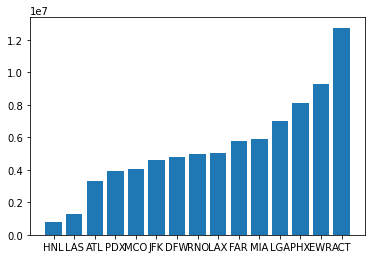

In [ ]:
distQuery=distanceQuery.toPandas()
plt.bar(distQuery['Airport1'],sorted(distQuery['Passengers']))

<BarContainer object of 15 artists>

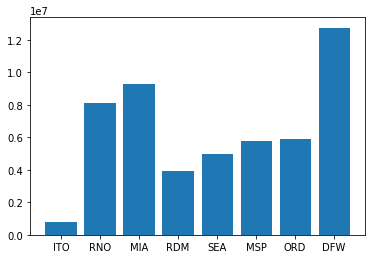

In [ ]:
plt.bar(distQuery['Airport2'],sorted(distQuery['Passengers']))

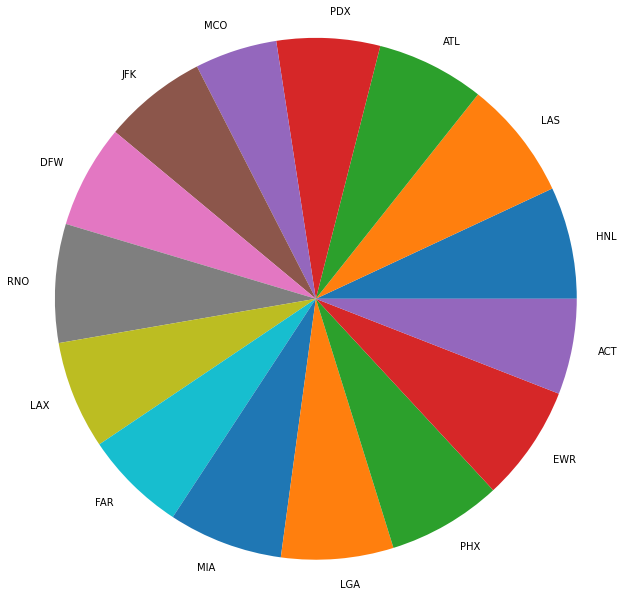

In [ ]:
plt.pie(distQuery['Occupancy_Rate'], labels =distQuery['Airport1'], radius=3)
plt.show() 

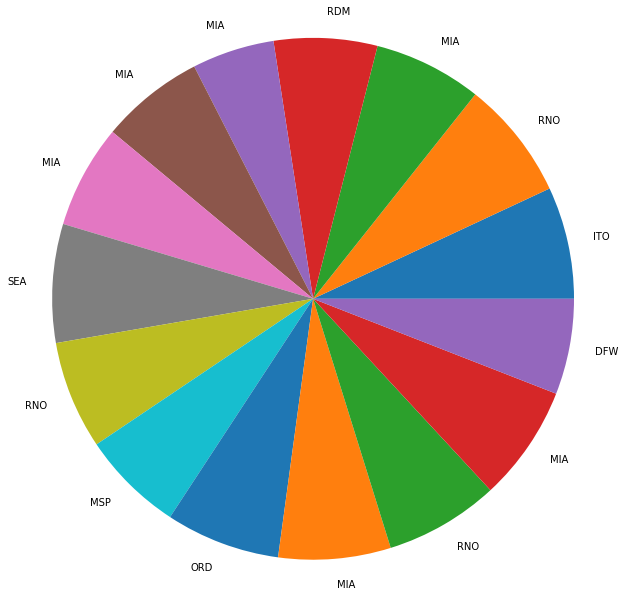

In [ ]:
plt.pie(distQuery['Occupancy_Rate'], labels =distQuery['Airport2'], radius=3)
plt.show() 

In [ ]:





distanceQuery = sqlContext.sql("""with table1 as 
                                    (select least(Origin_airport, Destination_airport) as Airport1, 
                                    greatest(Destination_airport, Origin_airport) as Airport2, 
                                    mean(Distance) as Distance,
                                    sum(Flights) as Flights
                                    from df
                                    group by least(Origin_airport, Destination_airport), greatest(Destination_airport, Origin_airport)
                                    order by 1,2)
                                    select t.*
                                    from table1 t
                                    where Flights>0
                                    order by Distance DESC
                                    limit 15;""")
# distanceQuery = distanceQuery.filter((col("Occupancy_Rate").isNotNull()) & (col("Occupancy_Rate")<=100.0))
distanceQuery.show(15)

+--------+--------+--------+-------+
|Airport1|Airport2|Distance|Flights|
+--------+--------+--------+-------+
|     HIK|     MIA|  4862.0|      1|
|     HNL|     MIA|  4862.0|      1|
|     ITO|     STL|  4036.0|      1|
|     ANC|     MIA|  4004.0|    280|
|     FAR|     HNL|  3807.0|      6|
|     ACT|     HIK|  3780.0|      1|
|     EDF|     WRB|  3495.0|      2|
|     ANC|     DOV|  3412.0|      1|
|     DOV|     EIL|  3293.0|      1|
|     ANC|     CNW|  3114.0|      1|
|     AZA|     ITO|  2823.0|      1|
|     DQF|     ITO|  2823.0|      1|
|     ITO|     PHX|  2804.0|      6|
|     HIK|     YUM|  2762.0|      1|
|     HNL|     YUM|  2762.0|      2|
+--------+--------+--------+-------+

